EDA(Exploratory Data Analysis-EDA)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
datosml = pd.read_csv('Datos\movies_dataML.csv', low_memory=False)
datosml.isna().sum().sort_values()


budget                      0
vote_average                0
title                       0
release_year                0
release_date                0
revenue                     0
original_language           0
id                          0
genres                      0
popularity                  0
return                      0
status                     50
runtime                   176
overview                  693
spoken_languages         2761
production_countries     4671
production_companies     9753
tagline                 22844
collection_name         38561
dtype: int64

<Axes: >

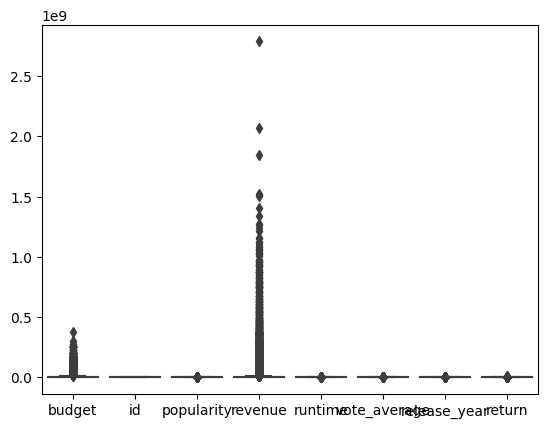

In [4]:
# Control de outliers

numeric_cols = datosml.select_dtypes(include=['float64', 'int64'])

stats = numeric_cols.describe()

q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers = (numeric_cols < lower_limit) | (numeric_cols > upper_limit)

sns.boxplot(data=numeric_cols[outliers.any(axis=1)])


In [5]:
outliers_revenue = datosml[datosml['revenue'] > upper_limit['revenue']]

outliers_revenue.head()


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,collection_name,release_year,return
0,11000000,"Adventure, Action, Science Fiction",11,en,Princess Leia is captured and held hostage by ...,42.149697,"Lucasfilm, Twentieth Century Fox Film Corporation",United States of America,1977-05-25,775398007.0,121.0,English,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,Star Wars Collection,1977,70.490728
1,18000000,"Adventure, Action, Science Fiction",1891,en,"The epic saga continues as Luke Skywalker, in ...",19.470959,"Lucasfilm, Twentieth Century Fox Film Corporation",United States of America,1980-05-17,538400000.0,124.0,English,Released,The Adventure Continues...,The Empire Strikes Back,8.2,Star Wars Collection,1980,29.911111
2,32350000,"Adventure, Action, Science Fiction",1892,en,As Rebel leaders map their strategy for an all...,14.586087,"Lucasfilm, Twentieth Century Fox Film Corporation",United States of America,1983-05-23,572700000.0,135.0,English,Released,The Empire Falls...,Return of the Jedi,7.9,Star Wars Collection,1983,17.703246
3,115000000,"Adventure, Action, Science Fiction",1893,en,"Anakin Skywalker, a young slave strong with th...",15.649091,Lucasfilm,United States of America,1999-05-19,924317558.0,136.0,English,Released,Every generation has a legend. Every journey h...,Star Wars: Episode I - The Phantom Menace,6.4,Star Wars Collection,1999,8.037544
4,120000000,"Adventure, Action, Science Fiction",1894,en,"Ten years after the invasion of Naboo, the gal...",14.072511,Lucasfilm,United States of America,2002-05-15,649398328.0,142.0,English,Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,6.4,Star Wars Collection,2002,5.411653


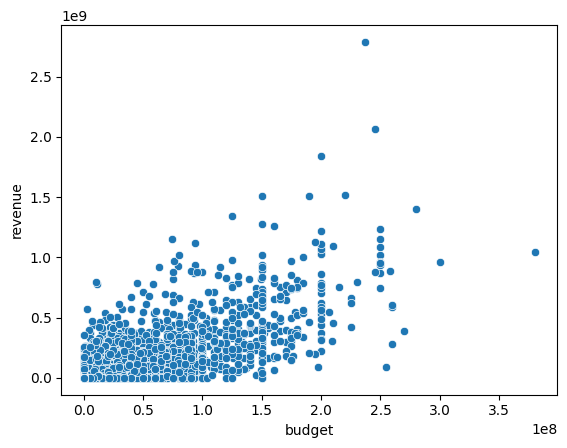

In [6]:
sns.scatterplot(x='budget', y='revenue', data=datosml)
plt.show()


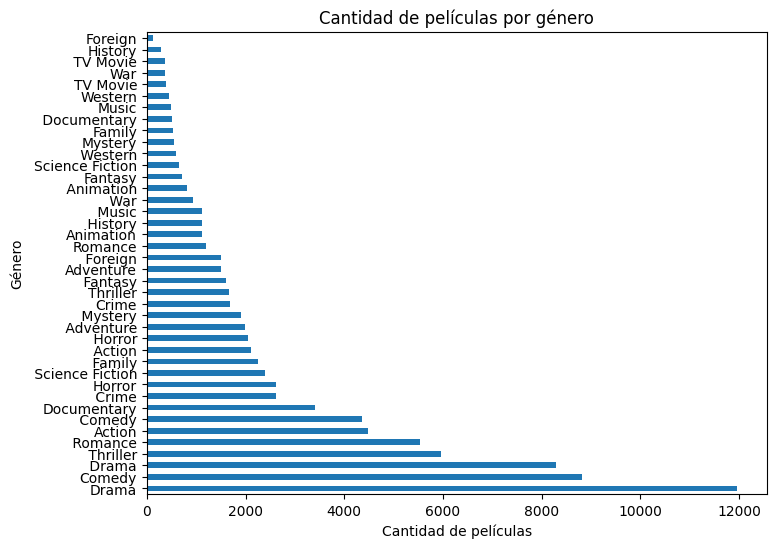

In [7]:
datosml['genres_list'] = datosml['genres'].str.split(',')

genres_df = datosml.explode('genres_list')

counts = genres_df['genres_list'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind='barh')
plt.title('Cantidad de películas por género')
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.show()


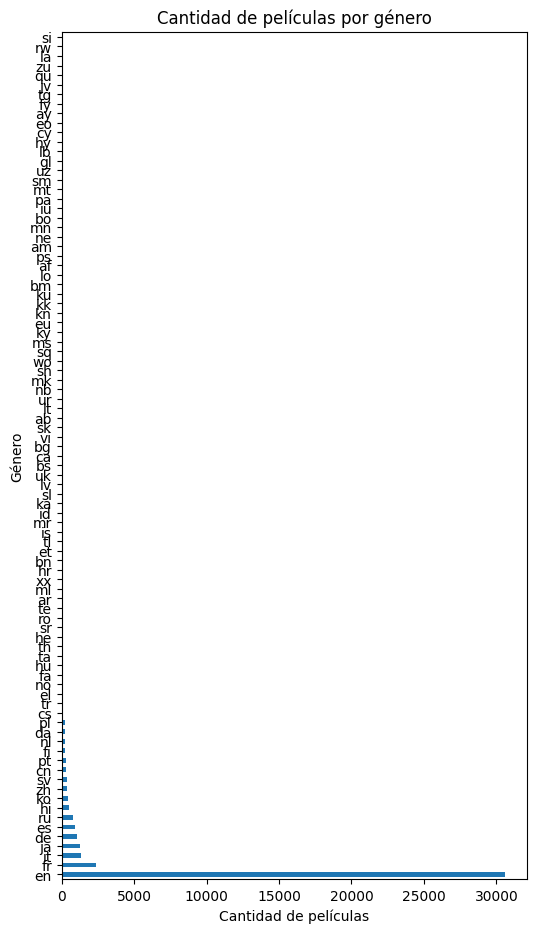

In [8]:
datosml['original_list'] = datosml['original_language'].str.split(',')

original_df = datosml.explode('original_list')

countsoriginal = original_df['original_list'].value_counts()

plt.figure(figsize=(6, 11))
countsoriginal.plot(kind='barh')
plt.title('Cantidad de películas por género')
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.show()


In [ ]:
# Entrenamiento ML
# Columnas para usar de recomendacion title y genres, se descarto original_langauge.


In [9]:
def recomendacion(titulo: str):

    peliculas = pd.read_csv('Datos\movies_dataML.csv', low_memory=False)

    peliculas = peliculas.head(5000)
    # vectorizar
    vectorizer_title = TfidfVectorizer()
    titulo_vectorizado = vectorizer_title.fit_transform(
        peliculas['title'].fillna(''))

    vectorizer_genres = TfidfVectorizer()
    generos_vectorizados = vectorizer_genres.fit_transform(
        peliculas['genres'].fillna(''))

    caracteristicas_combinadas = cosine_similarity(
        titulo_vectorizado) + cosine_similarity(
        generos_vectorizados)

    similitud_coseno = cosine_similarity(caracteristicas_combinadas)

    try:
        # encontrar la fila correspondiente al título ingresado
        idx = peliculas[peliculas['title'].str.lower() ==
                        titulo.lower()].index[0]

        puntuaciones_similitud = list(enumerate(similitud_coseno[idx]))

        puntuaciones_similitud = sorted(
            puntuaciones_similitud, key=lambda x: x[1], reverse=True)

        peliculas_similares = [peliculas.iloc[i[0]]['title']
                               for i in puntuaciones_similitud[1:6]]

        return peliculas_similares

    except:
        return "Lo siento, no pude encontrar una coincidencia para ese título."


In [10]:
recomendacion("Toy Story")

['Toy Story 2', 'Toy Story 3', 'Banana', 'A Close Shave', 'Hoodwinked!']